# Imports and Defaults

In [54]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

In [55]:
sns.set_theme(style="darkgrid")
posterior = "funnel10"

# Load Data

In [56]:
path = os.path.join("data", posterior, "summary.csv")
summary = pl.read_csv(path, has_header=True)
# summary = pd.read_csv(path, sep="\t")
print(summary)

shape: (2, 25)
┌────────────┬────────────┬──────────┬──────────┬───┬────────────┬───────┬────────────┬────────────┐
│ sampler_ty ┆ tags       ┆ c1       ┆ c2       ┆ … ┆ probabilis ┆ chain ┆ history_pa ┆ metric_pat │
│ pe         ┆ ---        ┆ ---      ┆ ---      ┆   ┆ tic        ┆ ---   ┆ th         ┆ h          │
│ ---        ┆ str        ┆ f64      ┆ f64      ┆   ┆ ---        ┆ i64   ┆ ---        ┆ ---        │
│ str        ┆            ┆          ┆          ┆   ┆ bool       ┆       ┆ str        ┆ str        │
╞════════════╪════════════╪══════════╪══════════╪═══╪════════════╪═══════╪════════════╪════════════╡
│ nuts       ┆ nuts-basel ┆ 0.003449 ┆ 0.015462 ┆ … ┆ null       ┆ 0     ┆ /mnt/home/ ┆ /mnt/home/ │
│            ┆ ine        ┆          ┆          ┆   ┆            ┆       ┆ gturok/drg ┆ gturok/drg │
│            ┆            ┆          ┆          ┆   ┆            ┆       ┆ hmc/data/f ┆ hmc/data/f │
│            ┆            ┆          ┆          ┆   ┆            ┆       ┆ u

In [57]:
summary.head()

sampler_type,tags,c1,c2,c1_log_scale,c2_log_scale,c1_latent,c2_latent,se1_max,se2_max,group,step_count_factor,step_count,step_count_method,step_size_factor,step_size,max_proposals,reduction_factor,damping,metric,adapt_metric,probabilistic,chain,history_path,metric_path
str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,i64,str,i64,i64,f64,str,bool,bool,i64,str,str
"""nuts""","""nuts-baseline""",0.003449,0.015462,0.003449,0.015462,0.000078,0.000047,0.03104,2895.404044,"""adapt_metric=T…",null,null,null,null,null,null,null,null,"""identity""",true,null,0,"""/mnt/home/gtur…","""/mnt/home/gtur…"
"""drghmc""","""drghmc-step_si…",0.004538,0.011032,0.000026,0.011032,0.004538,0.000107,0.406029,6619.386463,"""adapt_metric=T…",null,null,"""const_step_cou…",1,null,3,8,0.1,"""1""",true,false,0,"""/mnt/home/gtur…","""/mnt/home/gtur…"


# Box Plot

In [58]:
value_vars = ["c1_log_scale", "c2_log_scale", "c1_latent", "c2_latent"]
id_vars = [col for col in summary.columns if col not in value_vars]
melted = summary.melt(id_vars=id_vars, value_vars=value_vars, variable_name="param", value_name="bias")

# convert to pandas dartaframe from polars dataframe
data = pd.DataFrame(melted.to_pandas())

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


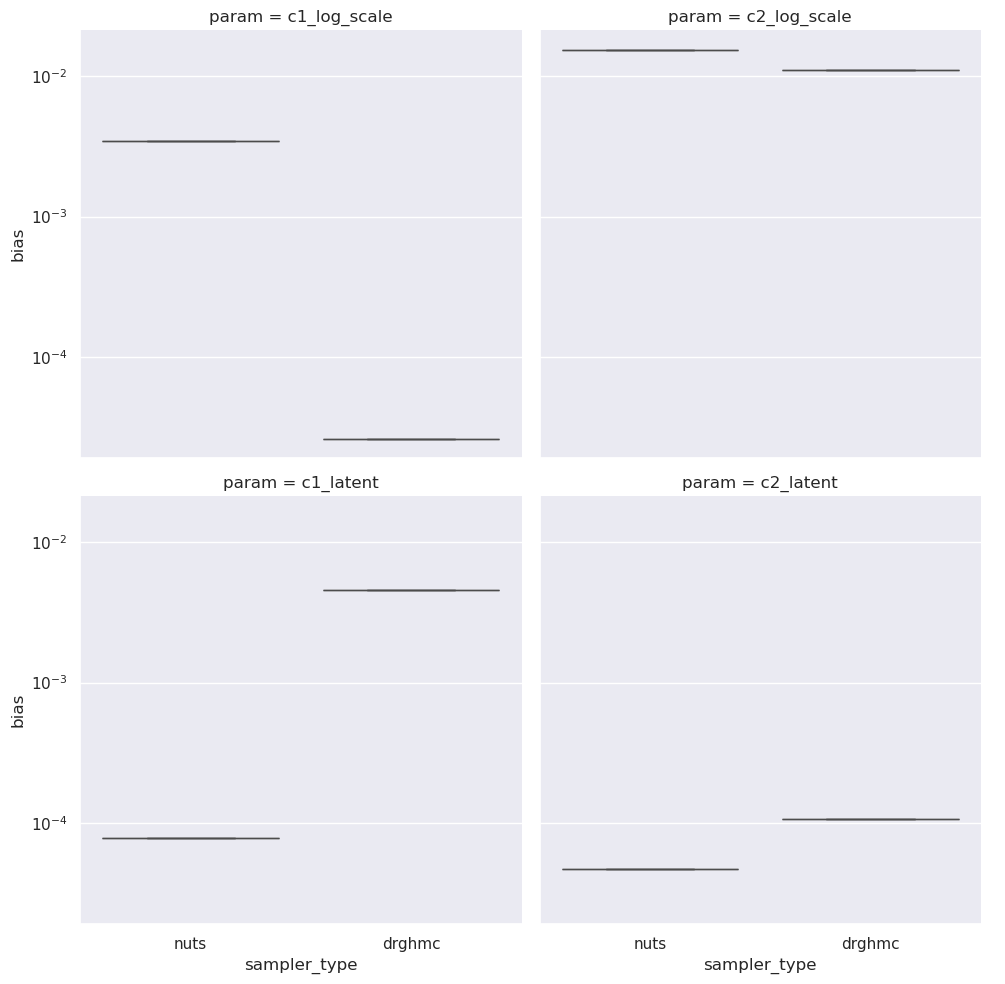

In [65]:
fig = sns.catplot(
    data=data,
    kind="box",
    x="sampler_type",
    y="bias",
    col="param",
    col_wrap=2,
    col_order=["c1_log_scale", "c2_log_scale", "c1_latent", "c2_latent"],
    log_scale=True,
)